In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Datasets 

In [2]:
dataset = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn_Data_Dictionary.csv")
dataset2 = pd.read_excel(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn_Messy.xlsx", sheet_name=None)
dataset3 = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Bank+Customer+Churn\Bank_Churn.csv")

In [3]:
# Extracting the sheets from the excel file

Customer_info = dataset2['Customer_Info']
Account_info = dataset2['Account_Info']

# Merging them into one DataFrame
merged_df = pd.merge(Customer_info, Account_info, on = 'CustomerId', how = 'inner')


## Data Cleaning


In [4]:
# Dropping unnecessary columns
merged_df.drop(columns = ['Tenure_x'], inplace = True)
merged_df.rename(columns = {'Tenure_y': 'Tenure'}, inplace = True)

In [5]:
merged_df.duplicated() # checking for duplicates
merged_df[merged_df.duplicated(keep=False)] 

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
10000,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,€38190.78,€130142.79,1,No,4,No,0


In [6]:
merged_df.drop_duplicates(inplace = True) # dropping duplicates

In [7]:
merged_df.reset_index(drop=True, inplace=True) # resetting the index

In [8]:
# Getting the first three indices of NaN values in the 'Surname' column
nan_indices = merged_df[merged_df['Surname'].isna()].index[:3]

replacements = ['McWilliams', 'Lombardo', 'Kennedy']

# Replacing the NaN values with the replacements
merged_df.loc[nan_indices, 'Surname'] = replacements

In [9]:
# Getting the first three indices of NaN values in the 'Age' column
nan_indices = merged_df[merged_df['Age'].isna()].index[:3]

# Creating a list of replacements for the NaN values
replacements = [43,39,32]

# Replacing the NaN values with the replacements
merged_df.loc[nan_indices, 'Age'] = replacements

In [10]:
merged_df['Surname'] = merged_df['Surname'].str.strip() # stripping the Surname column

In [11]:
# replacing the values in the Geography column
merged_df['Geography'] = merged_df['Geography'].replace({'FRA': 'France','French': 'France'})  

In [12]:
merged_df['Age'] = merged_df['Age'].astype(int) # converting the Age column to int

In [13]:
# replacing the €
merged_df['EstimatedSalary'] = merged_df['EstimatedSalary'].str.replace('€', '')
merged_df['Balance'] = merged_df['Balance'].str.replace('€', '') 

In [14]:
merged_df['Balance'] = merged_df['Balance'].astype(float) # converting the Balance column to float
merged_df['EstimatedSalary'] = merged_df['EstimatedSalary'].astype(float) # converting the EstimatedSalary column to float

In [15]:
# converting the HasCrCard column to int
merged_df['HasCrCard'] = merged_df['HasCrCard'].map({'Yes' : 1, 'No': 0}).astype(int)  

In [16]:
# converting the IsActiveMember column to int
merged_df['IsActiveMember'] = merged_df['IsActiveMember'].map({'Yes' : 1, 'No': 0}).astype(int)  

In [17]:
# Cleaned Data
merged_df.head(6)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,1,2,1,1
1,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,1,1,1,0
2,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,0,8,0,1
3,15701354,Boni,699,France,Female,39,93826.63,0.00,2,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,1,2,1,0
5,15574012,Chu,645,Spain,Male,44,149756.71,113755.78,2,0,8,0,1


# Exploratory Data Analysis

In [19]:
# Percentage of churn by gender where 1 = exited and 0 = not exited
pd.crosstab(merged_df['Gender'], merged_df['Exited'], margins=True, normalize= 'index') * 100

Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928
All,79.630000,20.370000


In [20]:
# Percentage of churn by geography where 1 = not exited and 0 = exited
pd.crosstab(merged_df['Geography'], merged_df['Exited'], margins=True, normalize= 'index') * 100

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395
All,79.630000,20.370000


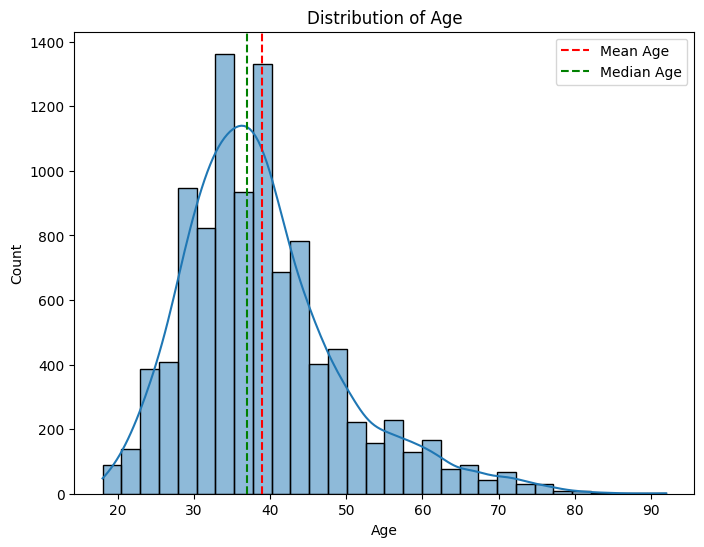

In [41]:
# distribution of Ages
plt.figure(figsize=(8, 6))
sns.histplot(data = merged_df, x = 'Age', kde = True, bins = 30)
plt.title('Distribution of Age')
plt.axvline(merged_df['Age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.axvline(merged_df['Age'].median(), color='green', linestyle='--', label='Median Age')
plt.legend()
plt.show()


In [28]:
# outliers in the Age column
Q1 = 32
Q3 = 44
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = merged_df[(merged_df['Age'] < lower_bound) | (merged_df['Age'] > upper_bound)]
print(f"{len(outliers)} outliers ({len(outliers)/10000:.1%})")

359 outliers (3.6%)


In [43]:
merged_df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


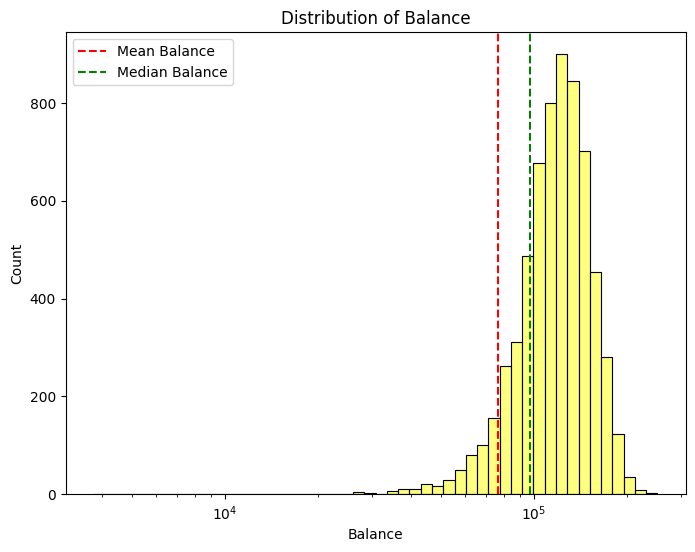

In [44]:
# distribution of Balance
plt.figure(figsize=(8, 6))
sns.histplot(data = merged_df, x = 'Balance', kde = True, bins = 50, log_scale=True, color='yellow')
plt.axvline(merged_df['Balance'].mean(), color='red', linestyle='--', label='Mean Balance')
plt.axvline(merged_df['Balance'].median(), color='green', linestyle='--', label='Median Balance')
plt.title('Distribution of Balance')
plt.legend()

# 🔍 EDA Insights:
- Majority of customers (50%) are between 32-44 years old
- The bank's typical customer appears to be middle-aged
- There's a small but notable population of elderly customers (up to 92)
- 0 balance: Investigate inactivity (25% of the customers!)
- 97k–127k: Middle-class customers (likely core revenue source)
- Above 127k: High-net-worth individuals (prioritize retention)